## Single Touch Payroll data

Reference: https://www.abs.gov.au/statistics/labour/earnings-and-work-hours/weekly-payroll-jobs-and-wages-australia/latest-release

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading csv into pandas
data = pd.read_csv("data.csv")
data.head()

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
0,0. Australia,0. All industries,0. Persons,0. All ages,92.8,95.2,96.7,97.5,98.0,98.7,...,96.3,96.5,96.4,96.4,96.5,96.2,96.1,95.9,95.6,95.5
1,0. Australia,0. All industries,0. Persons,1. Under 20,85.6,88.2,90.3,92.6,94.7,96.9,...,98.2,98.8,98.5,98.7,99.0,96.8,96.2,96.2,96.1,97.3
2,0. Australia,0. All industries,0. Persons,2. 20-29,91.3,94.1,96.1,97.1,97.5,98.1,...,93.5,94.0,93.9,93.9,94.0,93.9,93.7,93.6,93.3,93.3
3,0. Australia,0. All industries,0. Persons,3. 30-39,93.7,96.0,97.3,97.9,98.3,98.8,...,96.8,97.3,97.3,97.3,97.3,97.2,97.1,96.9,96.7,96.6
4,0. Australia,0. All industries,0. Persons,4. 40-49,93.8,95.9,97.1,97.8,98.3,98.9,...,97.5,98.0,97.9,98.1,98.1,98.0,97.9,97.8,97.5,97.5


In [3]:
# Check age groups
data['Age group'].unique()

array(['0. All ages', '1. Under 20', '2. 20-29', '3. 30-39', '4. 40-49',
       '5. 50-59', '6. 60-69', '7. 70 and over', nan], dtype=object)

In [4]:
# Renaming elements for easier referral in dataframe

# Removing integer in front of states
data["State or Territory"] = data["State or Territory"].replace({
    "0. Australia":"Australia",
    "1. NSW":"NSW",
    "2. VIC":"VIC",
    "3. QLD":"QLD",
    "4. SA":"SA",
    "5. WA":"WA",
    "6. TAS":"TAS",
    "7. NT":"NT",
    "8. ACT":"ACT"
})

# Removing integers in front of industries
data["Industry division"] = data["Industry division"].replace({
    "0. All industries":"All Industries",
    "01. A-Agriculture, forestry & fishing":"Agriculture, forestry & fishing",
    "02. B-Mining":"Mining",
    "03. C-Manufacturing":"Manufacturing",
    "04. D-Electricity, gas, water & waste services":"Electricity, gas, water & waste services",
    "05. E-Construction":"Construction",
    "06. F-Wholesale trade":"Wholesale trade",
    "07. G-Retail trade":"Retail trade",
    "08. H-Accommodation & food services":"Accommodation & food services",
    "09. I-Transport, postal & warehousing":"Transport, postal & warehousing",
    "10. J-Information media & telecommunications":"Information media & telecommunications",
    "11. K-Financial & insurance services":"Financial & insurance services",
    "12. L-Rental, hiring & real estate services":"Rental, hiring & real estate services",
    "13. M-Professional, scientific & technical services":"Professional, scientific & technical services",
    "14. N-Administrative & support services":"Administrative & support services",
    "15. O-Public administration & safety":"Public administration & safety",
    "16. P-Education & training":"Education & training",
    "17. Q-Health care & social assistance":"Health care & social assistance",
    "18. R-Arts & recreation services":"Arts & recreation services",
    "19. S-Other services":"Other services"  
})

# Removing integers in front of genders
data["Sex"] = data["Sex"].replace({
    "0. Persons":"Other",
    "1. Males":"Males",
    "2. Females":"Females"
})

# Removing integers in front of ages
data["Age group"] = data["Age group"].replace({
    "0. All ages":"All ages",
    "1. Under 20":"Under 20",
    "2. 20-29":"20-29",
    "3. 30-39":"30-39",
    "4. 40-49":"40-49",
    "5. 50-59":"50-59",
    "6. 60-69":"60-69",
    "7. 70 and over":"70 and over"
})

In [5]:
# Removing any nan values within the data frame
data = data.dropna()

In [6]:
# Checking all unique industry names
data["Industry division"].unique()

array(['All Industries', 'Agriculture, forestry & fishing', 'Mining',
       'Manufacturing', 'Electricity, gas, water & waste services',
       'Construction', 'Wholesale trade', 'Retail trade',
       'Accommodation & food services', 'Transport, postal & warehousing',
       'Information media & telecommunications',
       'Financial & insurance services',
       'Rental, hiring & real estate services',
       'Professional, scientific & technical services',
       'Administrative & support services',
       'Public administration & safety', 'Education & training',
       'Health care & social assistance', 'Arts & recreation services',
       'Other services'], dtype=object)

In [7]:
# Extracting data for Australia only from original dataframe
australia_df = data.loc[data['State or Territory'] == "Australia"]

In [8]:
# Extracting data for all industries in Australia from original dataframe
australia_all_industries = australia_df.loc[australia_df["Industry division"] == "All Industries"]
australia_all_industries.head()

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
0,Australia,All Industries,Other,All ages,92.8,95.2,96.7,97.5,98.0,98.7,...,96.3,96.5,96.4,96.4,96.5,96.2,96.1,95.9,95.6,95.5
1,Australia,All Industries,Other,Under 20,85.6,88.2,90.3,92.6,94.7,96.9,...,98.2,98.8,98.5,98.7,99.0,96.8,96.2,96.2,96.1,97.3
2,Australia,All Industries,Other,20-29,91.3,94.1,96.1,97.1,97.5,98.1,...,93.5,94.0,93.9,93.9,94.0,93.9,93.7,93.6,93.3,93.3
3,Australia,All Industries,Other,30-39,93.7,96.0,97.3,97.9,98.3,98.8,...,96.8,97.3,97.3,97.3,97.3,97.2,97.1,96.9,96.7,96.6
4,Australia,All Industries,Other,40-49,93.8,95.9,97.1,97.8,98.3,98.9,...,97.5,98.0,97.9,98.1,98.1,98.0,97.9,97.8,97.5,97.5


In [9]:
# Combining industry division, gender and age group into a single group column
australia_df["Group"] = australia_df["Industry division"] + "_" + australia_df["Sex"] + "_" + australia_df["Age group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Replacing the age group with combined groups
australia_df["Age group"] = australia_df["Group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
australia_df.head()

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20,Group
0,Australia,All Industries,Other,All Industries_Other_All ages,92.8,95.2,96.7,97.5,98.0,98.7,...,96.5,96.4,96.4,96.5,96.2,96.1,95.9,95.6,95.5,All Industries_Other_All ages
1,Australia,All Industries,Other,All Industries_Other_Under 20,85.6,88.2,90.3,92.6,94.7,96.9,...,98.8,98.5,98.7,99.0,96.8,96.2,96.2,96.1,97.3,All Industries_Other_Under 20
2,Australia,All Industries,Other,All Industries_Other_20-29,91.3,94.1,96.1,97.1,97.5,98.1,...,94.0,93.9,93.9,94.0,93.9,93.7,93.6,93.3,93.3,All Industries_Other_20-29
3,Australia,All Industries,Other,All Industries_Other_30-39,93.7,96.0,97.3,97.9,98.3,98.8,...,97.3,97.3,97.3,97.3,97.2,97.1,96.9,96.7,96.6,All Industries_Other_30-39
4,Australia,All Industries,Other,All Industries_Other_40-49,93.8,95.9,97.1,97.8,98.3,98.9,...,98.0,97.9,98.1,98.1,98.0,97.9,97.8,97.5,97.5,All Industries_Other_40-49


In [12]:
# Removing individual unwanted columns
del australia_df["State or Territory"]
del australia_df["Industry division"]
del australia_df["Sex"]
del australia_df["Group"]

In [13]:
# Renaming combined column into groups
australia_df = australia_df.rename(columns={
    "Age group":"Group"
})
australia_df.head()

,Group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,15-Feb-20,22-Feb-20,29-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
0,All Industries_Other_All ages,92.8,95.2,96.7,97.5,98.0,98.7,99.2,99.3,99.3,...,96.3,96.5,96.4,96.4,96.5,96.2,96.1,95.9,95.6,95.5
1,All Industries_Other_Under 20,85.6,88.2,90.3,92.6,94.7,96.9,98.2,96.9,96.0,...,98.2,98.8,98.5,98.7,99.0,96.8,96.2,96.2,96.1,97.3
2,All Industries_Other_20-29,91.3,94.1,96.1,97.1,97.5,98.1,98.7,99.0,99.1,...,93.5,94.0,93.9,93.9,94.0,93.9,93.7,93.6,93.3,93.3
3,All Industries_Other_30-39,93.7,96.0,97.3,97.9,98.3,98.8,99.3,99.4,99.5,...,96.8,97.3,97.3,97.3,97.3,97.2,97.1,96.9,96.7,96.6
4,All Industries_Other_40-49,93.8,95.9,97.1,97.8,98.3,98.9,99.3,99.4,99.4,...,97.5,98.0,97.9,98.1,98.1,98.0,97.9,97.8,97.5,97.5


In [14]:
# Checking transposed data
australia_df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,472
Group,All Industries_Other_All ages,All Industries_Other_Under 20,All Industries_Other_20-29,All Industries_Other_30-39,All Industries_Other_40-49,All Industries_Other_50-59,All Industries_Other_60-69,All Industries_Other_70 and over,All Industries_Males_All ages,All Industries_Males_Under 20,...,Other services_Other_All ages,Other services_Other_Under 20,Other services_Other_20-29,Other services_Other_30-39,Other services_Other_40-49,Other services_Other_50-59,Other services_Other_60-69,Other services_Other_70 and over,Other services_Males_All ages,Other services_Females_All ages
4-Jan-20,92.8,85.6,91.3,93.7,93.8,94.2,94.3,91.2,92.9,87.4,...,91.4,75.1,90.8,93,92.3,92.7,93.8,93.3,92.8,91.2
11-Jan-20,95.2,88.2,94.1,96,95.9,96.4,96.4,93.2,96,90.5,...,94.7,83.2,94.6,96,94.8,95.4,96.4,95.4,96.4,94
18-Jan-20,96.7,90.3,96.1,97.3,97.1,97.7,97.5,94.2,97.7,92.7,...,96.7,88.4,96.8,97.6,96.4,97.1,98.1,97.1,98.4,95.8
25-Jan-20,97.5,92.6,97.1,97.9,97.8,98.3,98.2,95.7,98.4,94.6,...,97.7,91.3,97.3,98.6,97.7,98.4,99.1,98.2,99.1,97


In [15]:
# Creating a transposed dataframe of Australia data
australia_df_t = australia_df.T

In [16]:
# Cleaning transposed dataframe
# Grabing the first row for the header
new_header = australia_df_t.iloc[0]

# Taking the data less the header row
australia_df_t = australia_df_t[1:] 

# Setting the header row as the df header
australia_df_t.columns = new_header 

In [17]:
australia_df_t.head()

Group,All Industries_Other_All ages,All Industries_Other_Under 20,All Industries_Other_20-29,All Industries_Other_30-39,All Industries_Other_40-49,All Industries_Other_50-59,All Industries_Other_60-69,All Industries_Other_70 and over,All Industries_Males_All ages,All Industries_Males_Under 20,...,Other services_Other_All ages,Other services_Other_Under 20,Other services_Other_20-29,Other services_Other_30-39,Other services_Other_40-49,Other services_Other_50-59,Other services_Other_60-69,Other services_Other_70 and over,Other services_Males_All ages,Other services_Females_All ages
4-Jan-20,92.8,85.6,91.3,93.7,93.8,94.2,94.3,91.2,92.9,87.4,...,91.4,75.1,90.8,93,92.3,92.7,93.8,93.3,92.8,91.2
11-Jan-20,95.2,88.2,94.1,96,95.9,96.4,96.4,93.2,96,90.5,...,94.7,83.2,94.6,96,94.8,95.4,96.4,95.4,96.4,94
18-Jan-20,96.7,90.3,96.1,97.3,97.1,97.7,97.5,94.2,97.7,92.7,...,96.7,88.4,96.8,97.6,96.4,97.1,98.1,97.1,98.4,95.8
25-Jan-20,97.5,92.6,97.1,97.9,97.8,98.3,98.2,95.7,98.4,94.6,...,97.7,91.3,97.3,98.6,97.7,98.4,99.1,98.2,99.1,97
1-Feb-20,98,94.7,97.5,98.3,98.3,98.7,98.7,97.1,98.6,96.5,...,98.3,93.4,97.8,98.7,98.6,99.1,99.7,99.3,99.4,97.9


In [18]:
# Filtering by elements check
australia_df_t.columns.str.contains("Male") & australia_df_t.columns.str.contains("Female")

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [19]:
# Filtering data by elements, replace a and b with desired elements
# add & australia_df_t.columns.str.contains(c) for additional filtering
a = "All Industries"
b = "All ages"
filter_df = australia_df_t.loc[:, (australia_df_t.columns.str.contains(a) & australia_df_t.columns.str.contains(b))]
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df.dtypes

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Group
All Industries_Other_All ages      float64
All Industries_Males_All ages       object
All Industries_Females_All ages     object
dtype: object

In [20]:
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df["All Industries_Males_All ages"] = pd.to_numeric(filter_df["All Industries_Males_All ages"])
filter_df["All Industries_Females_All ages"] = pd.to_numeric(filter_df["All Industries_Females_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [21]:
filter_df.head()

Group,All Industries_Other_All ages,All Industries_Males_All ages,All Industries_Females_All ages
4-Jan-20,92.8,92.9,93.5
11-Jan-20,95.2,96.0,95.3
18-Jan-20,96.7,97.7,96.5
25-Jan-20,97.5,98.4,97.3
1-Feb-20,98.0,98.6,98.0


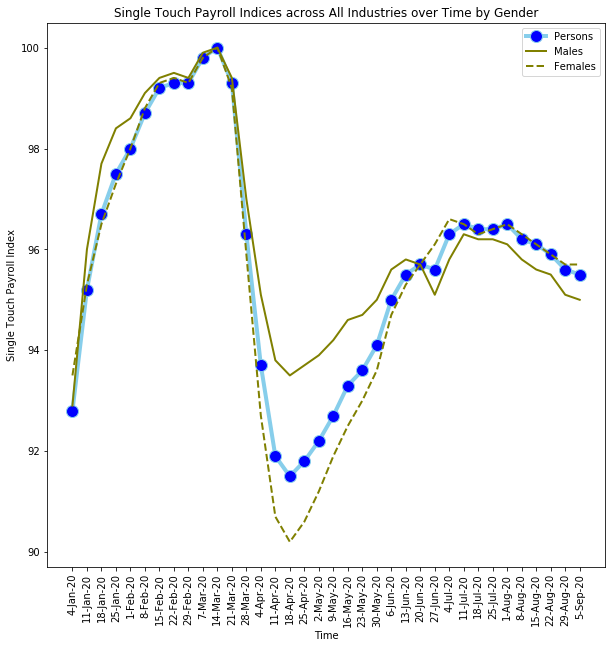

In [22]:
x_axis = np.arange(len(filter_df["All Industries_Other_All ages"]))
x_axis
plt.figure(figsize=((10,10)))
plt.plot(x_axis, filter_df["All Industries_Other_All ages"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label="Persons")
plt.plot(x_axis, filter_df["All Industries_Males_All ages"], marker='', color='olive', linewidth=2,label="Males")
plt.plot(x_axis, filter_df["All Industries_Females_All ages"], marker='', color='olive', linewidth=2, linestyle='dashed', label="Females")
x_labels = ("4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20","14-Mar-20","21-Mar-20",
            "28-Mar-20","4-Apr-20","11-Apr-20","18-Apr-20","25-Apr-20","2-May-20","9-May-20","16-May-20","23-May-20","30-May-20","6-Jun-20",
            "13-Jun-20","20-Jun-20","27-Jun-20","4-Jul-20","11-Jul-20","18-Jul-20","25-Jul-20","1-Aug-20","8-Aug-20","15-Aug-20","22-Aug-20",
            "29-Aug-20","5-Sep-20")
plt.xticks(x_axis,x_labels,rotation=90)
plt.xlabel("Time")
plt.ylabel("Single Touch Payroll Index")
plt.title("Single Touch Payroll Indices across All Industries over Time by Gender")
plt.legend()

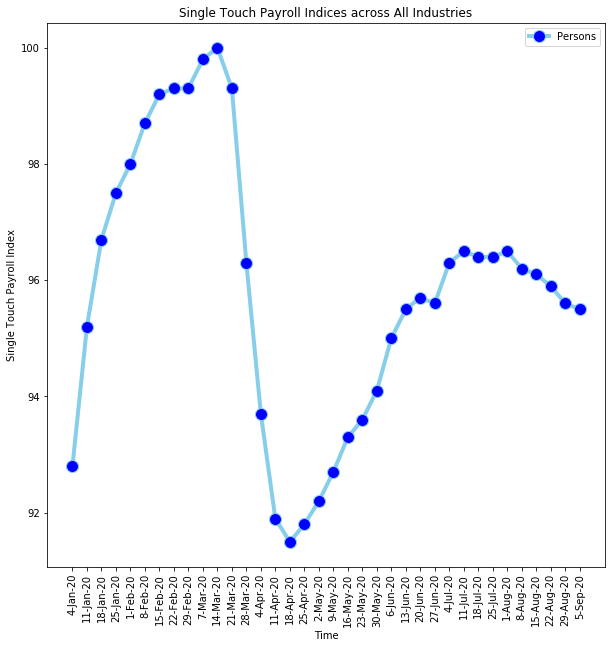

In [23]:
x_axis = np.arange(len(filter_df["All Industries_Other_All ages"]))
x_axis
plt.figure(figsize=((10,10)))
plt.plot(x_axis, filter_df["All Industries_Other_All ages"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label="Persons")
#plt.plot(x_axis, filter_df["All Industries_Males_All ages"], marker='', color='olive', linewidth=2,label="Males")
#plt.plot(x_axis, filter_df["All Industries_Females_All ages"], marker='', color='olive', linewidth=2, linestyle='dashed', label="Females")
x_labels = ("4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20","14-Mar-20","21-Mar-20",
            "28-Mar-20","4-Apr-20","11-Apr-20","18-Apr-20","25-Apr-20","2-May-20","9-May-20","16-May-20","23-May-20","30-May-20","6-Jun-20",
            "13-Jun-20","20-Jun-20","27-Jun-20","4-Jul-20","11-Jul-20","18-Jul-20","25-Jul-20","1-Aug-20","8-Aug-20","15-Aug-20","22-Aug-20",
            "29-Aug-20","5-Sep-20")
plt.xticks(x_axis,x_labels,rotation=90)
plt.xlabel("Time")
plt.ylabel("Single Touch Payroll Index")
plt.title("Single Touch Payroll Indices across All Industries")
plt.legend()
plt.savefig("STP.png")

In [24]:
a = "All Industries"
b = "Other"
c = "All ages"
filter_df = australia_df_t.loc[:, (australia_df_t.columns.str.contains(a) & australia_df_t.columns.str.contains(b) & australia_df_t.columns.str.contains(c))]
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [25]:
newcol = [a for a in list(filter_df["All Industries_Other_All ages"][:-1])]
newcol.insert(0,0)
filter_df["last_val"] = newcol
filter_df["diff"] = (filter_df["All Industries_Other_All ages"] - filter_df["last_val"])/(filter_df["last_val"]) * 100
filter_df = filter_df.drop(["4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20"])
filter_df.to_csv("percent_change_australia.csv", index=False, header=True)

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
a = "Accommodation & food services"
b = "Other"
c = "All ages"
filter_df = australia_df_t.loc[:, (australia_df_t.columns.str.contains(a) & australia_df_t.columns.str.contains(b) & australia_df_t.columns.str.contains(c))]
filter_df["Accommodation & food services_Other_All ages"] = pd.to_numeric(filter_df["Accommodation & food services_Other_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
newcol = [a for a in list(filter_df["Accommodation & food services_Other_All ages"][:-1])]
newcol.insert(0,0)
filter_df["last_val"] = newcol
filter_df["diff"] = (filter_df["Accommodation & food services_Other_All ages"] - filter_df["last_val"])/(filter_df["last_val"]) * 100
filter_df = filter_df.drop(["4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20"])
filter_df.to_csv("percent_change_australia_food.csv", index=False, header=True)

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Victoria

In [28]:
# Extracting data for Australia only from original dataframe
vic_australia_df = data.loc[data['State or Territory'] == "VIC"]
vic_australia_df

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
960,VIC,All Industries,Other,All ages,92.2,94.3,96.2,97.3,97.9,98.7,...,95.3,95.3,94.9,94.5,94.3,93.6,93.0,92.4,91.9,91.7
961,VIC,All Industries,Other,Under 20,83.5,85.6,89.0,91.9,94.9,96.9,...,94.8,93.7,91.1,89.3,87.8,82.8,80.2,79.7,78.8,79.5
962,VIC,All Industries,Other,20-29,90.8,93.1,95.5,96.8,97.3,98.2,...,92.1,92.0,91.3,90.5,90.2,89.5,88.7,88.0,87.6,87.4
963,VIC,All Industries,Other,30-39,93.2,95.3,97.0,97.8,98.1,98.7,...,96.4,96.8,96.6,96.2,96.0,95.7,95.3,94.7,94.3,94.1
964,VIC,All Industries,Other,40-49,93.2,94.9,96.4,97.4,98.0,98.7,...,96.9,97.3,97.4,97.2,97.2,96.8,96.5,95.9,95.5,95.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,VIC,Arts & recreation services,Males,All ages,95.5,97.4,99.7,100.8,100.8,99.8,...,84.3,85.3,84.6,83.9,82.6,80.2,81.4,80.6,80.8,80.3
1408,VIC,Arts & recreation services,Females,All ages,89.7,92.8,97.1,99.4,100.6,101.8,...,78.7,82.0,80.3,78.8,78.0,75.3,75.9,74.5,74.5,73.6
1416,VIC,Other services,Other,All ages,91.3,94.2,96.3,97.8,98.3,97.7,...,96.4,95.3,93.9,92.7,92.5,91.4,90.7,88.8,87.9,87.1
1424,VIC,Other services,Males,All ages,92.7,96.0,97.9,99.4,99.7,98.9,...,98.0,97.3,96.4,95.7,95.6,94.5,93.8,92.4,91.5,90.9


In [29]:
# Extracting data for all industries in Australia from original dataframe
vic_australia_all_industries = vic_australia_df.loc[vic_australia_df["Industry division"] == "All Industries"]
vic_australia_all_industries.head()

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
960,VIC,All Industries,Other,All ages,92.2,94.3,96.2,97.3,97.9,98.7,...,95.3,95.3,94.9,94.5,94.3,93.6,93.0,92.4,91.9,91.7
961,VIC,All Industries,Other,Under 20,83.5,85.6,89.0,91.9,94.9,96.9,...,94.8,93.7,91.1,89.3,87.8,82.8,80.2,79.7,78.8,79.5
962,VIC,All Industries,Other,20-29,90.8,93.1,95.5,96.8,97.3,98.2,...,92.1,92.0,91.3,90.5,90.2,89.5,88.7,88.0,87.6,87.4
963,VIC,All Industries,Other,30-39,93.2,95.3,97.0,97.8,98.1,98.7,...,96.4,96.8,96.6,96.2,96.0,95.7,95.3,94.7,94.3,94.1
964,VIC,All Industries,Other,40-49,93.2,94.9,96.4,97.4,98.0,98.7,...,96.9,97.3,97.4,97.2,97.2,96.8,96.5,95.9,95.5,95.3


In [30]:
# Combining industry division, gender and age group into a single group column
vic_australia_df["Group"] = vic_australia_df["Industry division"] + "_" + vic_australia_df["Sex"] + "_" + vic_australia_df["Age group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# Replacing the age group with combined groups
vic_australia_df["Age group"] = vic_australia_df["Group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# Removing individual unwanted columns
del vic_australia_df["State or Territory"]
del vic_australia_df["Industry division"]
del vic_australia_df["Sex"]
del vic_australia_df["Group"]

In [33]:
# Renaming combined column into groups
vic_australia_df = vic_australia_df.rename(columns={
    "Age group":"Group"
})

In [34]:
# Checking transposed data
vic_australia_df.T.head()

,960,961,962,963,964,965,966,967,968,969,...,1360,1368,1376,1384,1392,1400,1408,1416,1424,1432
Group,All Industries_Other_All ages,All Industries_Other_Under 20,All Industries_Other_20-29,All Industries_Other_30-39,All Industries_Other_40-49,All Industries_Other_50-59,All Industries_Other_60-69,All Industries_Other_70 and over,All Industries_Males_All ages,All Industries_Males_Under 20,...,Education & training_Females_All ages,Health care & social assistance_Other_All ages,Health care & social assistance_Males_All ages,Health care & social assistance_Females_All ages,Arts & recreation services_Other_All ages,Arts & recreation services_Males_All ages,Arts & recreation services_Females_All ages,Other services_Other_All ages,Other services_Males_All ages,Other services_Females_All ages
4-Jan-20,92.2,83.5,90.8,93.2,93.2,93.6,94.2,91.7,92.3,85.7,...,85.2,94.6,95.9,94.6,91.9,95.5,89.7,91.3,92.7,91.2
11-Jan-20,94.3,85.6,93.1,95.3,94.9,95.5,95.7,92.6,95,88,...,83.2,96.3,97.2,96.3,94.4,97.4,92.8,94.2,96,93.6
18-Jan-20,96.2,89,95.5,97,96.4,97,97.1,94.5,97.2,91.7,...,83.5,97.1,97.8,97.2,97.8,99.7,97.1,96.3,97.9,95.9
25-Jan-20,97.3,91.9,96.8,97.8,97.4,98.1,98.2,96,98.2,94.1,...,85.3,98.9,99.4,99.1,99.7,100.8,99.4,97.8,99.4,97.2


In [35]:
# Creating a transposed dataframe of Australia data
vic_australia_df_t = vic_australia_df.T

In [36]:
# Cleaning transposed dataframe
# Grabing the first row for the header
new_header = vic_australia_df_t.iloc[0]

# Taking the data less the header row
vic_australia_df_t = vic_australia_df_t[1:] 

# Setting the header row as the df header
vic_australia_df_t.columns = new_header

In [37]:
# Filtering data by elements, replace a and b with desired elements
# add & australia_df_t.columns.str.contains(c) for additional filtering
a = "All Industries"
b = "All ages"
filter_df = vic_australia_df_t.loc[:, (vic_australia_df_t.columns.str.contains(a) & vic_australia_df_t.columns.str.contains(b))]
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df.dtypes

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Group
All Industries_Other_All ages      float64
All Industries_Males_All ages       object
All Industries_Females_All ages     object
dtype: object

In [38]:
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df["All Industries_Males_All ages"] = pd.to_numeric(filter_df["All Industries_Males_All ages"])
filter_df["All Industries_Females_All ages"] = pd.to_numeric(filter_df["All Industries_Females_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

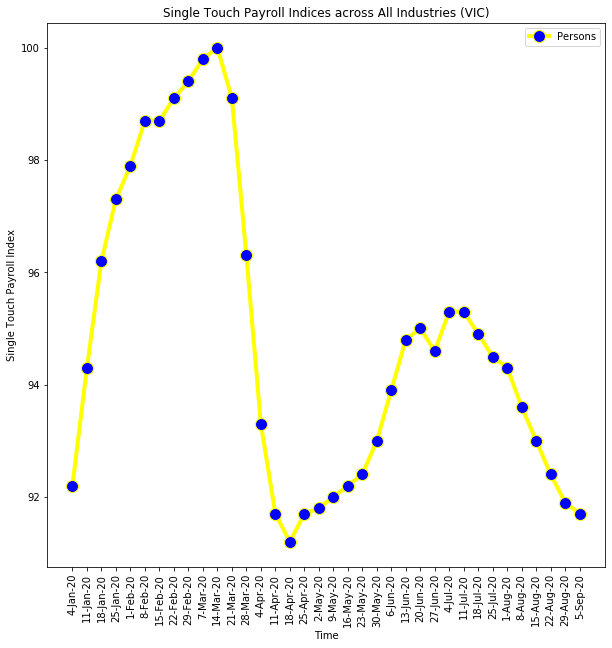

In [39]:
x_axis = np.arange(len(filter_df["All Industries_Other_All ages"]))
x_axis
plt.figure(figsize=((10,10)))
plt.plot(x_axis, filter_df["All Industries_Other_All ages"], marker='o', markerfacecolor='blue', markersize=12, color='yellow', linewidth=4,label="Persons")

x_labels = ("4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20","14-Mar-20","21-Mar-20",
            "28-Mar-20","4-Apr-20","11-Apr-20","18-Apr-20","25-Apr-20","2-May-20","9-May-20","16-May-20","23-May-20","30-May-20","6-Jun-20",
            "13-Jun-20","20-Jun-20","27-Jun-20","4-Jul-20","11-Jul-20","18-Jul-20","25-Jul-20","1-Aug-20","8-Aug-20","15-Aug-20","22-Aug-20",
            "29-Aug-20","5-Sep-20")
plt.xticks(x_axis,x_labels,rotation=90)
plt.xlabel("Time")
plt.ylabel("Single Touch Payroll Index")
plt.title("Single Touch Payroll Indices across All Industries (VIC)")
plt.legend()
plt.show()

In [40]:
a = "Accommodation & food services"
b = "Other"
c = "All ages"
filter_df = vic_australia_df_t.loc[:, (vic_australia_df_t.columns.str.contains(a) & vic_australia_df_t.columns.str.contains(b) & vic_australia_df_t.columns.str.contains(c))]
filter_df["Accommodation & food services_Other_All ages"] = pd.to_numeric(filter_df["Accommodation & food services_Other_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
newcol = [a for a in list(filter_df["Accommodation & food services_Other_All ages"][:-1])]
newcol.insert(0,0)
filter_df["last_val"] = newcol
filter_df["diff"] = (filter_df["Accommodation & food services_Other_All ages"] - filter_df["last_val"])/(filter_df["last_val"]) * 100
filter_df = filter_df.drop(["4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Western Australia

In [42]:
# Extracting data for Australia only from original dataframe
wa_australia_df = data.loc[data['State or Territory'] == "WA"]
wa_australia_df.head()

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
2400,WA,All Industries,Other,All ages,94.2,96.6,97.7,98.0,98.0,99.0,...,97.9,98.4,98.1,98.3,98.7,98.7,98.9,98.9,99.1,99.1
2401,WA,All Industries,Other,Under 20,87,89.6,92.3,94.0,95.2,97.9,...,100.4,102.2,103.0,104.6,105.8,105.5,106.9,107.2,107.6,108.2
2402,WA,All Industries,Other,20-29,92.6,95.4,97.1,97.6,97.9,99.0,...,96.1,97.0,96.9,97.0,97.6,97.8,98.1,98.2,98.4,98.4
2403,WA,All Industries,Other,30-39,94.3,96.7,97.7,98.0,98.0,98.7,...,98.1,98.8,98.5,98.6,99.0,99.1,99.3,99.3,99.4,99.4
2404,WA,All Industries,Other,40-49,95.1,97.2,98.0,98.0,98.0,98.8,...,98.7,99.2,98.8,99.1,99.6,99.6,99.8,99.9,100.0,100.1


In [43]:
# Extracting data for all industries in Australia from original dataframe
wa_australia_all_industries = wa_australia_df.loc[wa_australia_df["Industry division"] == "All Industries"]
wa_australia_all_industries.head()

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
2400,WA,All Industries,Other,All ages,94.2,96.6,97.7,98.0,98.0,99.0,...,97.9,98.4,98.1,98.3,98.7,98.7,98.9,98.9,99.1,99.1
2401,WA,All Industries,Other,Under 20,87,89.6,92.3,94.0,95.2,97.9,...,100.4,102.2,103.0,104.6,105.8,105.5,106.9,107.2,107.6,108.2
2402,WA,All Industries,Other,20-29,92.6,95.4,97.1,97.6,97.9,99.0,...,96.1,97.0,96.9,97.0,97.6,97.8,98.1,98.2,98.4,98.4
2403,WA,All Industries,Other,30-39,94.3,96.7,97.7,98.0,98.0,98.7,...,98.1,98.8,98.5,98.6,99.0,99.1,99.3,99.3,99.4,99.4
2404,WA,All Industries,Other,40-49,95.1,97.2,98.0,98.0,98.0,98.8,...,98.7,99.2,98.8,99.1,99.6,99.6,99.8,99.9,100.0,100.1


In [44]:
# Combining industry division, gender and age group into a single group column
wa_australia_df["Group"] = wa_australia_df["Industry division"] + "_" + wa_australia_df["Sex"] + "_" + wa_australia_df["Age group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
# Replacing the age group with combined groups
wa_australia_df["Age group"] = wa_australia_df["Group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
# Removing individual unwanted columns
del wa_australia_df["State or Territory"]
del wa_australia_df["Industry division"]
del wa_australia_df["Sex"]
del wa_australia_df["Group"]

In [47]:
# Renaming combined column into groups
wa_australia_df = wa_australia_df.rename(columns={
    "Age group":"Group"
})
wa_australia_df.head()

,Group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,15-Feb-20,22-Feb-20,29-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
2400,All Industries_Other_All ages,94.2,96.6,97.7,98.0,98.0,99.0,99.7,99.4,99.1,...,97.9,98.4,98.1,98.3,98.7,98.7,98.9,98.9,99.1,99.1
2401,All Industries_Other_Under 20,87,89.6,92.3,94.0,95.2,97.9,99.1,97.2,96.3,...,100.4,102.2,103.0,104.6,105.8,105.5,106.9,107.2,107.6,108.2
2402,All Industries_Other_20-29,92.6,95.4,97.1,97.6,97.9,99.0,99.7,99.7,99.3,...,96.1,97.0,96.9,97.0,97.6,97.8,98.1,98.2,98.4,98.4
2403,All Industries_Other_30-39,94.3,96.7,97.7,98.0,98.0,98.7,99.3,99.1,99.1,...,98.1,98.8,98.5,98.6,99.0,99.1,99.3,99.3,99.4,99.4
2404,All Industries_Other_40-49,95.1,97.2,98.0,98.0,98.0,98.8,99.3,99.1,99.0,...,98.7,99.2,98.8,99.1,99.6,99.6,99.8,99.9,100.0,100.1


In [48]:
# Checking transposed data
wa_australia_df.T.head()

,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,...,2800,2808,2816,2824,2832,2840,2848,2856,2864,2872
Group,All Industries_Other_All ages,All Industries_Other_Under 20,All Industries_Other_20-29,All Industries_Other_30-39,All Industries_Other_40-49,All Industries_Other_50-59,All Industries_Other_60-69,All Industries_Other_70 and over,All Industries_Males_All ages,All Industries_Males_Under 20,...,Education & training_Females_All ages,Health care & social assistance_Other_All ages,Health care & social assistance_Males_All ages,Health care & social assistance_Females_All ages,Arts & recreation services_Other_All ages,Arts & recreation services_Males_All ages,Arts & recreation services_Females_All ages,Other services_Other_All ages,Other services_Males_All ages,Other services_Females_All ages
4-Jan-20,94.2,87,92.6,94.3,95.1,96.2,96.8,93.5,93.7,88.4,...,94.1,97.4,96.8,98,99.2,100.8,98.7,91.6,93.3,91.2
11-Jan-20,96.6,89.6,95.4,96.7,97.2,98.4,98.8,95.1,96.6,92.4,...,94.1,100.8,100.3,101.2,100.6,101.7,100.4,95.2,97.3,94.4
18-Jan-20,97.7,92.3,97.1,97.7,98,99.2,99.3,93.9,97.8,95,...,93.8,101.5,100.7,102,102,102.6,102,96.5,99.2,95
25-Jan-20,98,94,97.6,98,98,99.2,99.4,94.5,98.2,96,...,90.6,102.4,101.4,102.9,103.1,103.6,103.2,97,99.4,95.7


In [49]:
# Creating a transposed dataframe of Australia data
wa_australia_df_t = wa_australia_df.T

In [50]:
# Cleaning transposed dataframe
# Grabing the first row for the header
new_header = wa_australia_df_t.iloc[0]

# Taking the data less the header row
wa_australia_df_t = wa_australia_df_t[1:] 

# Setting the header row as the df header
wa_australia_df_t.columns = new_header

In [51]:
wa_australia_df_t.head()

Group,All Industries_Other_All ages,All Industries_Other_Under 20,All Industries_Other_20-29,All Industries_Other_30-39,All Industries_Other_40-49,All Industries_Other_50-59,All Industries_Other_60-69,All Industries_Other_70 and over,All Industries_Males_All ages,All Industries_Males_Under 20,...,Education & training_Females_All ages,Health care & social assistance_Other_All ages,Health care & social assistance_Males_All ages,Health care & social assistance_Females_All ages,Arts & recreation services_Other_All ages,Arts & recreation services_Males_All ages,Arts & recreation services_Females_All ages,Other services_Other_All ages,Other services_Males_All ages,Other services_Females_All ages
4-Jan-20,94.2,87,92.6,94.3,95.1,96.2,96.8,93.5,93.7,88.4,...,94.1,97.4,96.8,98,99.2,100.8,98.7,91.6,93.3,91.2
11-Jan-20,96.6,89.6,95.4,96.7,97.2,98.4,98.8,95.1,96.6,92.4,...,94.1,100.8,100.3,101.2,100.6,101.7,100.4,95.2,97.3,94.4
18-Jan-20,97.7,92.3,97.1,97.7,98,99.2,99.3,93.9,97.8,95,...,93.8,101.5,100.7,102,102,102.6,102,96.5,99.2,95
25-Jan-20,98,94,97.6,98,98,99.2,99.4,94.5,98.2,96,...,90.6,102.4,101.4,102.9,103.1,103.6,103.2,97,99.4,95.7
1-Feb-20,98,95.2,97.9,98,98,98.8,98.7,94.1,98.1,97.1,...,89.2,102,101.2,102.5,108.1,107.1,109,97.5,99.3,96.6


In [52]:
# Filtering by elements check
wa_australia_df_t.columns.str.contains("Male") & wa_australia_df_t.columns.str.contains("Female")

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [53]:
# Filtering data by elements, replace a and b with desired elements
# add & australia_df_t.columns.str.contains(c) for additional filtering
a = "All Industries"
b = "All ages"
filter_df = wa_australia_df_t.loc[:, (wa_australia_df_t.columns.str.contains(a) & wa_australia_df_t.columns.str.contains(b))]
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df.dtypes

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Group
All Industries_Other_All ages      float64
All Industries_Males_All ages       object
All Industries_Females_All ages     object
dtype: object

In [54]:
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df["All Industries_Males_All ages"] = pd.to_numeric(filter_df["All Industries_Males_All ages"])
filter_df["All Industries_Females_All ages"] = pd.to_numeric(filter_df["All Industries_Females_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

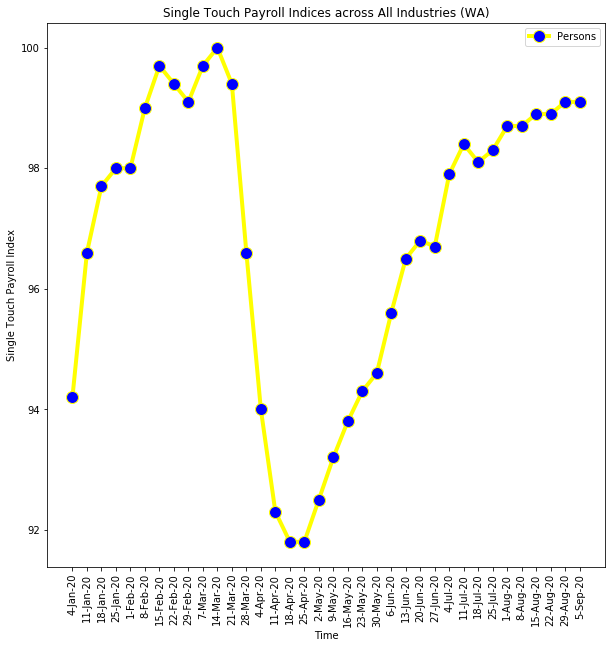

In [55]:
x_axis = np.arange(len(filter_df["All Industries_Other_All ages"]))
x_axis
plt.figure(figsize=((10,10)))
plt.plot(x_axis, filter_df["All Industries_Other_All ages"], marker='o', markerfacecolor='blue', markersize=12, color='yellow', linewidth=4,label="Persons")

x_labels = ("4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20","14-Mar-20","21-Mar-20",
            "28-Mar-20","4-Apr-20","11-Apr-20","18-Apr-20","25-Apr-20","2-May-20","9-May-20","16-May-20","23-May-20","30-May-20","6-Jun-20",
            "13-Jun-20","20-Jun-20","27-Jun-20","4-Jul-20","11-Jul-20","18-Jul-20","25-Jul-20","1-Aug-20","8-Aug-20","15-Aug-20","22-Aug-20",
            "29-Aug-20","5-Sep-20")
plt.xticks(x_axis,x_labels,rotation=90)
plt.xlabel("Time")
plt.ylabel("Single Touch Payroll Index")
plt.title("Single Touch Payroll Indices across All Industries (WA)")
plt.legend()
plt.show()

In [56]:
a = "All Industries"
b = "Other"
c = "All ages"
filter_df = wa_australia_df_t.loc[:, (wa_australia_df_t.columns.str.contains(a) & wa_australia_df_t.columns.str.contains(b) & wa_australia_df_t.columns.str.contains(c))]
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
newcol = [a for a in list(filter_df["All Industries_Other_All ages"][:-1])]
newcol.insert(0,0)
filter_df["last_val"] = newcol
filter_df["diff"] = (filter_df["All Industries_Other_All ages"] - filter_df["last_val"])/(filter_df["last_val"]) * 100
filter_df = filter_df.drop(["4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20"])
filter_df.to_csv("wa_percent_change_australia.csv", index=False, header=True)

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Queensland

In [58]:
# Extracting data for Australia only from original dataframe
qld_australia_df = data.loc[data['State or Territory'] == "QLD"]
qld_australia_df

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
1440,QLD,All Industries,Other,All ages,92.4,95.6,97.1,97.8,98.1,98.6,...,96.4,96.9,97.1,97.5,97.4,97.1,96.9,97.2,96.5,96.9
1441,QLD,All Industries,Other,Under 20,87.4,91.6,91.6,93.2,93.5,97.7,...,98.9,100.3,101.5,102.3,102.8,98.9,98.8,100.3,100.5,101.9
1442,QLD,All Industries,Other,20-29,91.4,95.0,97.0,97.7,97.7,98.1,...,94.1,94.8,95.2,95.6,95.5,95.5,95.2,95.8,95.3,95.8
1443,QLD,All Industries,Other,30-39,93.1,96.1,97.6,98.1,98.3,98.5,...,96.6,97.2,97.4,97.7,97.5,97.5,97.3,97.6,96.9,97.2
1444,QLD,All Industries,Other,40-49,93.2,95.9,97.4,98.0,98.4,98.6,...,97.4,97.9,98.1,98.5,98.4,98.4,98.2,98.3,97.6,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,QLD,Arts & recreation services,Males,All ages,93.1,96.4,97.9,98.8,100.6,101.0,...,87.3,89.0,90.2,91.3,91.2,91.0,91.3,92.7,91.6,91.4
1888,QLD,Arts & recreation services,Females,All ages,90.4,95.6,98.5,99.7,102.2,103.1,...,85.5,89.1,90.1,91.6,91.4,91.2,91.6,93.0,92.5,91.9
1896,QLD,Other services,Other,All ages,90.6,94.5,97.1,98.6,98.9,98.6,...,96.9,96.8,97.2,97.6,96.3,96.2,96.0,95.9,95.5,96.1
1904,QLD,Other services,Males,All ages,92,96.2,98.9,99.8,99.6,98.7,...,97.4,96.9,97.0,97.0,96.3,96.3,96.1,95.8,95.4,95.6


In [59]:
# Extracting data for all industries in Australia from original dataframe
qld_australia_all_industries = qld_australia_df.loc[qld_australia_df["Industry division"] == "All Industries"]
qld_australia_all_industries

,State or Territory,Industry division,Sex,Age group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
1440,QLD,All Industries,Other,All ages,92.4,95.6,97.1,97.8,98.1,98.6,...,96.4,96.9,97.1,97.5,97.4,97.1,96.9,97.2,96.5,96.9
1441,QLD,All Industries,Other,Under 20,87.4,91.6,91.6,93.2,93.5,97.7,...,98.9,100.3,101.5,102.3,102.8,98.9,98.8,100.3,100.5,101.9
1442,QLD,All Industries,Other,20-29,91.4,95.0,97.0,97.7,97.7,98.1,...,94.1,94.8,95.2,95.6,95.5,95.5,95.2,95.8,95.3,95.8
1443,QLD,All Industries,Other,30-39,93.1,96.1,97.6,98.1,98.3,98.5,...,96.6,97.2,97.4,97.7,97.5,97.5,97.3,97.6,96.9,97.2
1444,QLD,All Industries,Other,40-49,93.2,95.9,97.4,98.0,98.4,98.6,...,97.4,97.9,98.1,98.5,98.4,98.4,98.2,98.3,97.6,98.0
1445,QLD,All Industries,Other,50-59,93.7,96.4,97.7,98.2,98.6,98.8,...,97.5,97.9,98.0,98.5,98.4,98.4,98.2,98.3,97.5,97.9
1446,QLD,All Industries,Other,60-69,93.7,96.5,97.8,98.5,99.0,99.1,...,95.8,95.5,95.6,95.8,95.7,95.5,95.1,95.1,94.2,94.6
1447,QLD,All Industries,Other,70 and over,89.7,92.6,94.2,96.9,97.8,98.7,...,93.6,92.4,92.6,92.6,92.7,92.2,91.6,91.7,90.9,90.9
1448,QLD,All Industries,Males,All ages,92.4,96.4,98.1,98.6,98.7,99.0,...,96.2,96.7,96.7,97.2,97.0,96.8,96.5,96.8,96.1,96.3
1449,QLD,All Industries,Males,Under 20,88.7,93.4,93.5,94.8,95.0,98.9,...,98.1,98.7,98.9,99.4,99.6,96.0,95.3,96.7,96.3,97.8


In [60]:
# Combining industry division, gender and age group into a single group column
qld_australia_df["Group"] = qld_australia_df["Industry division"] + "_" + qld_australia_df["Sex"] + "_" + qld_australia_df["Age group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
# Replacing the age group with combined groups
qld_australia_df["Age group"] = qld_australia_df["Group"]

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
# Removing individual unwanted columns
del qld_australia_df["State or Territory"]
del qld_australia_df["Industry division"]
del qld_australia_df["Sex"]
del qld_australia_df["Group"]

In [63]:
# Renaming combined column into groups
qld_australia_df = qld_australia_df.rename(columns={
    "Age group":"Group"
})
qld_australia_df.head()

,Group,4-Jan-20,11-Jan-20,18-Jan-20,25-Jan-20,1-Feb-20,8-Feb-20,15-Feb-20,22-Feb-20,29-Feb-20,...,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20,5-Sep-20
1440,All Industries_Other_All ages,92.4,95.6,97.1,97.8,98.1,98.6,99.1,99.3,99.1,...,96.4,96.9,97.1,97.5,97.4,97.1,96.9,97.2,96.5,96.9
1441,All Industries_Other_Under 20,87.4,91.6,91.6,93.2,93.5,97.7,98.4,97.1,96.1,...,98.9,100.3,101.5,102.3,102.8,98.9,98.8,100.3,100.5,101.9
1442,All Industries_Other_20-29,91.4,95.0,97.0,97.7,97.7,98.1,98.8,99.2,99.0,...,94.1,94.8,95.2,95.6,95.5,95.5,95.2,95.8,95.3,95.8
1443,All Industries_Other_30-39,93.1,96.1,97.6,98.1,98.3,98.5,99.1,99.5,99.3,...,96.6,97.2,97.4,97.7,97.5,97.5,97.3,97.6,96.9,97.2
1444,All Industries_Other_40-49,93.2,95.9,97.4,98.0,98.4,98.6,99.2,99.4,99.3,...,97.4,97.9,98.1,98.5,98.4,98.4,98.2,98.3,97.6,98.0


In [64]:
# Checking transposed data
qld_australia_df.T.head()

,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,...,1840,1848,1856,1864,1872,1880,1888,1896,1904,1912
Group,All Industries_Other_All ages,All Industries_Other_Under 20,All Industries_Other_20-29,All Industries_Other_30-39,All Industries_Other_40-49,All Industries_Other_50-59,All Industries_Other_60-69,All Industries_Other_70 and over,All Industries_Males_All ages,All Industries_Males_Under 20,...,Education & training_Females_All ages,Health care & social assistance_Other_All ages,Health care & social assistance_Males_All ages,Health care & social assistance_Females_All ages,Arts & recreation services_Other_All ages,Arts & recreation services_Males_All ages,Arts & recreation services_Females_All ages,Other services_Other_All ages,Other services_Males_All ages,Other services_Females_All ages
4-Jan-20,92.4,87.4,91.4,93.1,93.2,93.7,93.7,89.7,92.4,88.7,...,79.8,94.2,95.4,94.2,91.4,93.1,90.4,90.6,92,90
11-Jan-20,95.6,91.6,95,96.1,95.9,96.4,96.5,92.6,96.4,93.4,...,80.5,95.7,96.6,95.8,95.7,96.4,95.6,94.5,96.2,93.7
18-Jan-20,97.1,91.6,97,97.6,97.4,97.7,97.8,94.2,98.1,93.5,...,81.8,96.7,97.4,96.8,97.9,97.9,98.5,97.1,98.9,96
25-Jan-20,97.8,93.2,97.7,98.1,98,98.2,98.5,96.9,98.6,94.8,...,84.9,97.3,98.1,97.2,99.1,98.8,99.7,98.6,99.8,97.9


In [65]:
# Creating a transposed dataframe of Australia data
qld_australia_df_t = qld_australia_df.T

In [66]:
# Cleaning transposed dataframe
# Grabing the first row for the header
new_header = qld_australia_df_t.iloc[0]

# Taking the data less the header row
qld_australia_df_t = qld_australia_df_t[1:] 

# Setting the header row as the df header
qld_australia_df_t.columns = new_header

In [67]:
qld_australia_df_t.head()

Group,All Industries_Other_All ages,All Industries_Other_Under 20,All Industries_Other_20-29,All Industries_Other_30-39,All Industries_Other_40-49,All Industries_Other_50-59,All Industries_Other_60-69,All Industries_Other_70 and over,All Industries_Males_All ages,All Industries_Males_Under 20,...,Education & training_Females_All ages,Health care & social assistance_Other_All ages,Health care & social assistance_Males_All ages,Health care & social assistance_Females_All ages,Arts & recreation services_Other_All ages,Arts & recreation services_Males_All ages,Arts & recreation services_Females_All ages,Other services_Other_All ages,Other services_Males_All ages,Other services_Females_All ages
4-Jan-20,92.4,87.4,91.4,93.1,93.2,93.7,93.7,89.7,92.4,88.7,...,79.8,94.2,95.4,94.2,91.4,93.1,90.4,90.6,92,90
11-Jan-20,95.6,91.6,95,96.1,95.9,96.4,96.5,92.6,96.4,93.4,...,80.5,95.7,96.6,95.8,95.7,96.4,95.6,94.5,96.2,93.7
18-Jan-20,97.1,91.6,97,97.6,97.4,97.7,97.8,94.2,98.1,93.5,...,81.8,96.7,97.4,96.8,97.9,97.9,98.5,97.1,98.9,96
25-Jan-20,97.8,93.2,97.7,98.1,98,98.2,98.5,96.9,98.6,94.8,...,84.9,97.3,98.1,97.2,99.1,98.8,99.7,98.6,99.8,97.9
1-Feb-20,98.1,93.5,97.7,98.3,98.4,98.6,99,97.8,98.7,95,...,89.3,97.1,97.9,97.1,101.5,100.6,102.2,98.9,99.6,98.6


In [68]:
# Filtering data by elements, replace a and b with desired elements
# add & australia_df_t.columns.str.contains(c) for additional filtering
a = "All Industries"
b = "All ages"
filter_df = qld_australia_df_t.loc[:, (qld_australia_df_t.columns.str.contains(a) & qld_australia_df_t.columns.str.contains(b))]
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df.dtypes

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Group
All Industries_Other_All ages      float64
All Industries_Males_All ages       object
All Industries_Females_All ages     object
dtype: object

In [69]:
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])
filter_df["All Industries_Males_All ages"] = pd.to_numeric(filter_df["All Industries_Males_All ages"])
filter_df["All Industries_Females_All ages"] = pd.to_numeric(filter_df["All Industries_Females_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

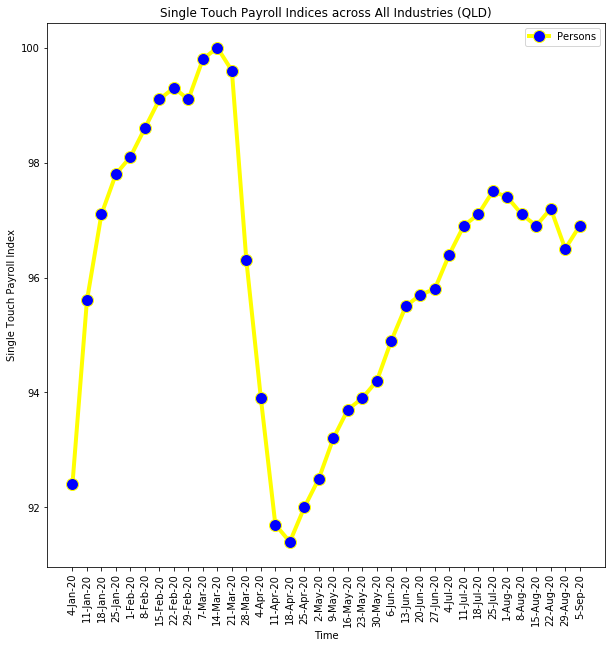

In [70]:
x_axis = np.arange(len(filter_df["All Industries_Other_All ages"]))
x_axis
plt.figure(figsize=((10,10)))
plt.plot(x_axis, filter_df["All Industries_Other_All ages"], marker='o', markerfacecolor='blue', markersize=12, color='yellow', linewidth=4,label="Persons")

x_labels = ("4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20","14-Mar-20","21-Mar-20",
            "28-Mar-20","4-Apr-20","11-Apr-20","18-Apr-20","25-Apr-20","2-May-20","9-May-20","16-May-20","23-May-20","30-May-20","6-Jun-20",
            "13-Jun-20","20-Jun-20","27-Jun-20","4-Jul-20","11-Jul-20","18-Jul-20","25-Jul-20","1-Aug-20","8-Aug-20","15-Aug-20","22-Aug-20",
            "29-Aug-20","5-Sep-20")
plt.xticks(x_axis,x_labels,rotation=90)
plt.xlabel("Time")
plt.ylabel("Single Touch Payroll Index")
plt.title("Single Touch Payroll Indices across All Industries (QLD)")
plt.legend()
plt.show()

In [71]:
a = "All Industries"
b = "Other"
c = "All ages"
filter_df = qld_australia_df_t.loc[:, (qld_australia_df_t.columns.str.contains(a) & qld_australia_df_t.columns.str.contains(b) & qld_australia_df_t.columns.str.contains(c))]
filter_df["All Industries_Other_All ages"] = pd.to_numeric(filter_df["All Industries_Other_All ages"])

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [72]:
newcol = [a for a in list(filter_df["All Industries_Other_All ages"][:-1])]
newcol.insert(0,0)
filter_df["last_val"] = newcol
filter_df["diff"] = (filter_df["All Industries_Other_All ages"] - filter_df["last_val"])/(filter_df["last_val"]) * 100
filter_df = filter_df.drop(["4-Jan-20","11-Jan-20","18-Jan-20","25-Jan-20","1-Feb-20","8-Feb-20","15-Feb-20","22-Feb-20","29-Feb-20","7-Mar-20"])
filter_df.to_csv("qld_percent_change_australia.csv", index=False, header=True)

C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\beera\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
